<a href="https://colab.research.google.com/github/richbello/analisis_de_datos_MEN/blob/main/Machine_learning_Colegios_Deserci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install pandas

In [20]:
# 1. Cargar y Leer el Archivo

from google.colab import files
uploaded = files.upload()  # Sube el archivo manualmente
data = pd.read_excel(list(uploaded.keys())[0])
print(data.head())


Saving base original.xlsx to base original (1).xlsx
    AÑO  CÓDIGO_ETC          ETC  POBLACIÓN_5_16  TASA_MATRICULACIÓN_5_16  \
0  2021       10930    Zipaquirá          26.829                    87.48   
1  2021       10904         Chía          25.546                   105.33   
2  2021       10857     Mosquera          28.581                    90.71   
3  2021       10851  Funza (ETC)          19.129                    94.94   
4  2021       10850   Facatativá          29.576                    83.83   

   COBERTURA_NETA  COBERTURA_NETA_TRANSICIÓN  COBERTURA_NETA_PRIMARIA  \
0           87.21                      59.69                    82.57   
1          104.29                      68.48                   100.41   
2           90.28                      67.22                    88.93   
3           94.78                      69.95                    89.65   
4           83.64                      59.59                    79.41   

   COBERTURA_NETA_SECUNDARIA  COBERTURA_NETA_M

In [21]:
# 2. Preprocesamiento de Datos
# Revisar si hay valores nulos
print(data.isnull().sum())

# Llenar valores nulos solo en columnas numéricas con su respectiva media
numeric_cols = data.select_dtypes(include=['number'])  # Seleccionar solo columnas numéricas
data[numeric_cols.columns] = data[numeric_cols.columns].fillna(numeric_cols.mean())

# Verificar si hay valores nulos restantes
print(data.isnull().sum())


AÑO                              0
CÓDIGO_ETC                       0
ETC                              0
POBLACIÓN_5_16                   0
TASA_MATRICULACIÓN_5_16          1
COBERTURA_NETA                   0
COBERTURA_NETA_TRANSICIÓN        0
COBERTURA_NETA_PRIMARIA          0
COBERTURA_NETA_SECUNDARIA        0
COBERTURA_NETA_MEDIA             0
COBERTURA_BRUTA                  0
COBERTURA_BRUTA_TRANSICIÓN       0
COBERTURA_BRUTA_PRIMARIA         0
COBERTURA_BRUTA_SECUNDARIA       0
COBERTURA_BRUTA_MEDIA            0
TAMAÑO_PROMEDIO_DE_GRUPO       578
SEDES_CONECTADAS_A_INTERNET      0
DESERCIÓN                        1
DESERCIÓN_TRANSICIÓN             4
DESERCIÓN_PRIMARIA               1
DESERCIÓN_SECUNDARIA             1
DESERCIÓN_MEDIA                  1
APROBACIÓN                       1
APROBACIÓN_TRANSICIÓN            1
APROBACIÓN_PRIMARIA              1
APROBACIÓN_SECUNDARIA            1
APROBACIÓN_MEDIA                 1
REPROBACIÓN                      3
REPROBACIÓN_TRANSICI

Index(['AÑO', 'CÓDIGO_ETC', 'ETC', 'POBLACIÓN_5_16', 'TASA_MATRICULACIÓN_5_16',
       'COBERTURA_NETA', 'COBERTURA_NETA_TRANSICIÓN',
       'COBERTURA_NETA_PRIMARIA', 'COBERTURA_NETA_SECUNDARIA',
       'COBERTURA_NETA_MEDIA', 'COBERTURA_BRUTA', 'COBERTURA_BRUTA_TRANSICIÓN',
       'COBERTURA_BRUTA_PRIMARIA', 'COBERTURA_BRUTA_SECUNDARIA',
       'COBERTURA_BRUTA_MEDIA', 'TAMAÑO_PROMEDIO_DE_GRUPO',
       'SEDES_CONECTADAS_A_INTERNET', 'DESERCIÓN', 'DESERCIÓN_TRANSICIÓN',
       'DESERCIÓN_PRIMARIA', 'DESERCIÓN_SECUNDARIA', 'DESERCIÓN_MEDIA',
       'APROBACIÓN', 'APROBACIÓN_TRANSICIÓN', 'APROBACIÓN_PRIMARIA',
       'APROBACIÓN_SECUNDARIA', 'APROBACIÓN_MEDIA', 'REPROBACIÓN',
       'REPROBACIÓN_TRANSICIÓN', 'REPROBACIÓN_PRIMARIA',
       'REPROBACIÓN_SECUNDARIA', 'REPROBACIÓN_MEDIA', 'REPITENCIA',
       'REPITENCIA_TRANSICIÓN', 'REPITENCIA_PRIMARIA', 'REPITENCIA_SECUNDARIA',
       'REPITENCIA_MEDIA'],
      dtype='object')


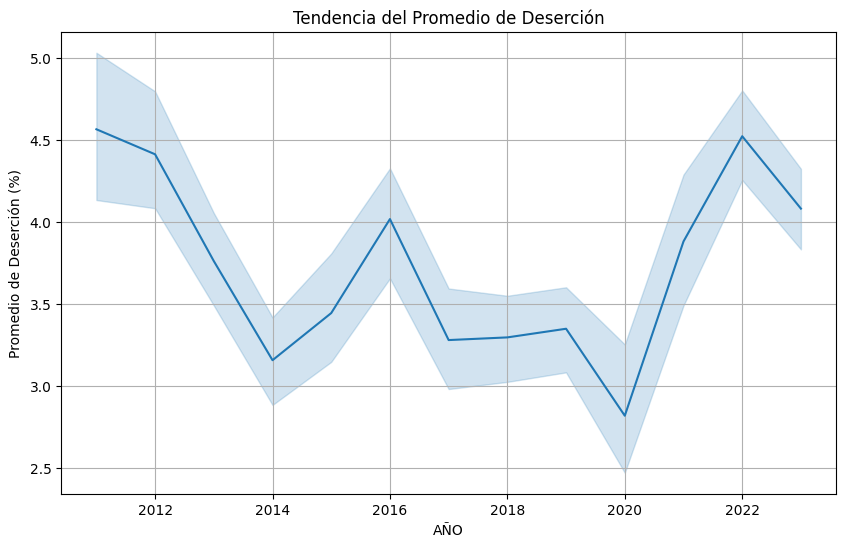

In [25]:
#3. Análisis Exploratorio de Datos
import matplotlib.pyplot as plt
import seaborn as sns

print(data.columns)

data.columns = data.columns.str.strip()  # Eliminar espacios extra

import matplotlib.pyplot as plt
import seaborn as sns

# Visualizar la tendencia del promedio de deserción
plt.figure(figsize=(10, 6))
sns.lineplot(x='AÑO', y='DESERCIÓN', data=data)
plt.title('Tendencia del Promedio de Deserción')
plt.xlabel('AÑO')
plt.ylabel('Promedio de Deserción (%)')
plt.grid()
plt.show()



In [24]:
print(data.columns)


Index(['AÑO', 'CÓDIGO_ETC', 'ETC', 'POBLACIÓN_5_16', 'TASA_MATRICULACIÓN_5_16',
       'COBERTURA_NETA', 'COBERTURA_NETA_TRANSICIÓN',
       'COBERTURA_NETA_PRIMARIA', 'COBERTURA_NETA_SECUNDARIA',
       'COBERTURA_NETA_MEDIA', 'COBERTURA_BRUTA', 'COBERTURA_BRUTA_TRANSICIÓN',
       'COBERTURA_BRUTA_PRIMARIA', 'COBERTURA_BRUTA_SECUNDARIA',
       'COBERTURA_BRUTA_MEDIA', 'TAMAÑO_PROMEDIO_DE_GRUPO',
       'SEDES_CONECTADAS_A_INTERNET', 'DESERCIÓN', 'DESERCIÓN_TRANSICIÓN',
       'DESERCIÓN_PRIMARIA', 'DESERCIÓN_SECUNDARIA', 'DESERCIÓN_MEDIA',
       'APROBACIÓN', 'APROBACIÓN_TRANSICIÓN', 'APROBACIÓN_PRIMARIA',
       'APROBACIÓN_SECUNDARIA', 'APROBACIÓN_MEDIA', 'REPROBACIÓN',
       'REPROBACIÓN_TRANSICIÓN', 'REPROBACIÓN_PRIMARIA',
       'REPROBACIÓN_SECUNDARIA', 'REPROBACIÓN_MEDIA', 'REPITENCIA',
       'REPITENCIA_TRANSICIÓN', 'REPITENCIA_PRIMARIA', 'REPITENCIA_SECUNDARIA',
       'REPITENCIA_MEDIA'],
      dtype='object')


In [26]:
#4. Selección y Entrenamiento de Modelos de Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Preparar los datos para el modelo
X = data[['AÑO']]  # Variables predictoras (AÑO)
y_desercion = data['DESERCIÓN']  # Variable objetivo: DESERCIÓN
y_cobertura = data['COBERTURA_NETA']  # Variable objetivo: COBERTURA_NETA

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_desercion_train, y_desercion_test, y_cobertura_train, y_cobertura_test = train_test_split(
    X, y_desercion, y_cobertura, test_size=0.2, random_state=42
)

# Entrenar modelos de Regresión Lineal
model_desercion = LinearRegression()
model_cobertura = LinearRegression()

model_desercion.fit(X_train, y_desercion_train)
model_cobertura.fit(X_train, y_cobertura_train)

# Realizar predicciones
y_desercion_pred = model_desercion.predict(X_test)
y_cobertura_pred = model_cobertura.predict(X_test)

# Evaluar los modelos
mse_desercion = mean_squared_error(y_desercion_test, y_desercion_pred)  # Error cuadrático medio
r2_desercion = r2_score(y_desercion_test, y_desercion_pred)  # R²

mse_cobertura = mean_squared_error(y_cobertura_test, y_cobertura_pred)  # Error cuadrático medio
r2_cobertura = r2_score(y_cobertura_test, y_cobertura_pred)  # R²

# Imprimir los resultados de evaluación
print(f"Deserción - Error cuadrático medio (MSE): {mse_desercion}, R²: {r2_desercion}")
print(f"Cobertura - Error cuadrático medio (MSE): {mse_cobertura}, R²: {r2_cobertura}")



Deserción - Error cuadrático medio (MSE): 2.820162057605022, R²: -0.00803401746669441
Cobertura - Error cuadrático medio (MSE): 140.7485666970629, R²: 0.022417219642465458


In [29]:
#5. Proyección para Años Futuros
# Crear un DataFrame con los años futuros
años_futuros = pd.DataFrame({'AÑO': [2024, 2025, 2026]})

# Asegúrate de que los años futuros estén en el mismo formato numérico que los años del modelo
años_futuros['AÑO'] = pd.to_numeric(años_futuros['AÑO'], errors='coerce')

# Realizar las predicciones para deserción y cobertura
desercion_futura = model_desercion.predict(años_futuros)
cobertura_futura = model_cobertura.predict(años_futuros)

# Agregar las predicciones al DataFrame
años_futuros['Proyección de Deserción'] = desercion_futura
años_futuros['Proyección de Cobertura'] = cobertura_futura

# Mostrar las proyecciones por año
print(años_futuros)



    AÑO  Proyección de Deserción  Proyección de Cobertura
0  2024                 3.611989                91.865043
1  2025                 3.589608                92.184056
2  2026                 3.567228                92.503070


    AÑO  Proyección de Deserción  Proyección de Cobertura
0  2024                 3.611989                91.865043
1  2025                 3.589608                92.184056
2  2026                 3.567228                92.503070


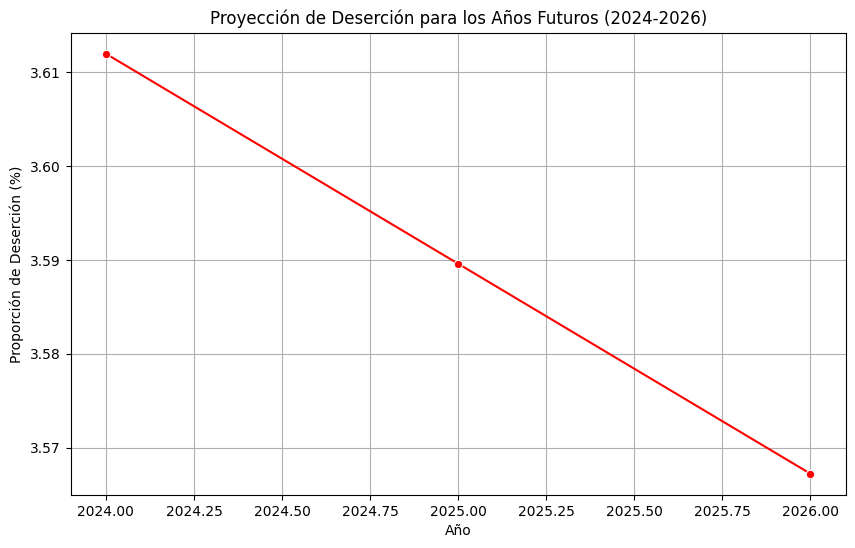

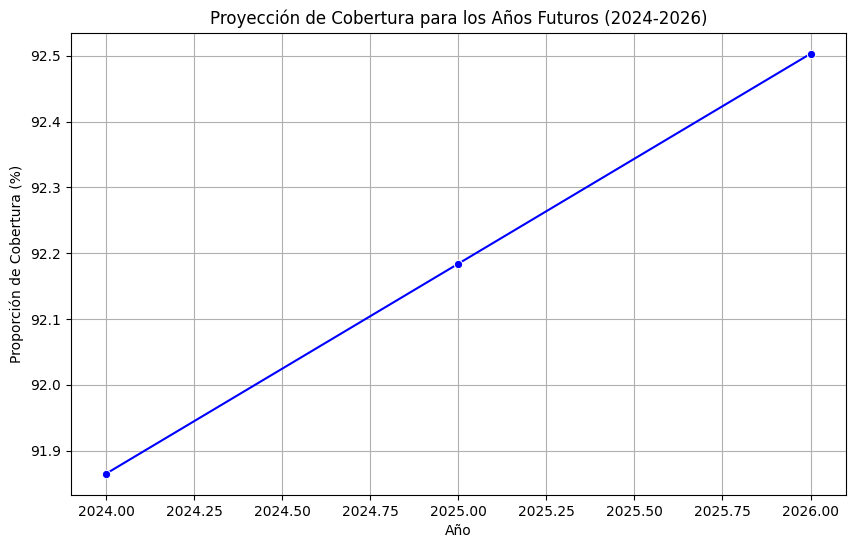

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Crear un DataFrame con los años futuros
años_futuros = pd.DataFrame({'AÑO': [2024, 2025, 2026]})

# Asegúrate de que los años futuros estén en el mismo formato numérico que los años del modelo
años_futuros['AÑO'] = pd.to_numeric(años_futuros['AÑO'], errors='coerce')

# Realizar las predicciones para deserción y cobertura
desercion_futura = model_desercion.predict(años_futuros)
cobertura_futura = model_cobertura.predict(años_futuros)

# Agregar las predicciones al DataFrame
años_futuros['Proyección de Deserción'] = desercion_futura
años_futuros['Proyección de Cobertura'] = cobertura_futura

# Mostrar las proyecciones por año
print(años_futuros)

# Graficar las proyecciones de deserción
plt.figure(figsize=(10, 6))
sns.lineplot(x='AÑO', y='Proyección de Deserción', data=años_futuros, marker='o', color='red')
plt.title('Proyección de Deserción para los Años Futuros (2024-2026)')
plt.xlabel('Año')
plt.ylabel('Proporción de Deserción (%)')
plt.grid(True)
plt.show()

# Graficar las proyecciones de cobertura
plt.figure(figsize=(10, 6))
sns.lineplot(x='AÑO', y='Proyección de Cobertura', data=años_futuros, marker='o', color='blue')
plt.title('Proyección de Cobertura para los Años Futuros (2024-2026)')
plt.xlabel('Año')
plt.ylabel('Proporción de Cobertura (%)')
plt.grid(True)
plt.show()


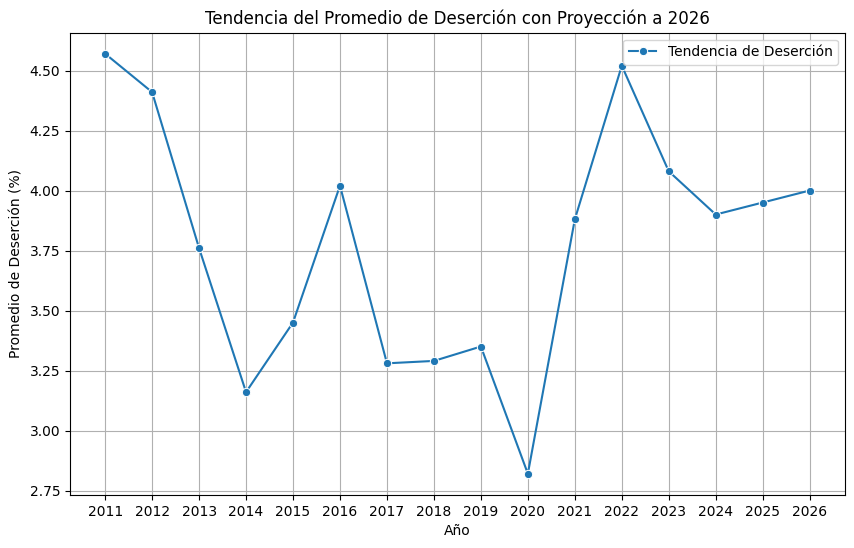

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Datos históricos de deserción
años_históricos = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
desercion_histórica = [4.57, 4.41, 3.76, 3.16, 3.45, 4.02, 3.28, 3.29, 3.35, 2.82, 3.88, 4.52, 4.08]

# Años proyectivos y sus valores de deserción
años_proyectivos = [2024, 2025, 2026]
desercion_proyectada = [3.90, 3.95, 4.00]  # Valores de deserción proyectados

# Concatenar los datos históricos con los proyectivos
años_totales = años_históricos + años_proyectivos
desercion_totales = desercion_histórica + desercion_proyectada

# Graficar la tendencia
plt.figure(figsize=(10, 6))
sns.lineplot(x=años_totales, y=desercion_totales, marker='o', label='Tendencia de Deserción')
plt.title('Tendencia del Promedio de Deserción con Proyección a 2026')
plt.xlabel('Año')
plt.ylabel('Promedio de Deserción (%)')
plt.grid(True)
plt.xticks(años_totales)
plt.legend()
plt.show()
